In [85]:
# Fem els imports 

from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import normaltest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import  LabelEncoder

In [86]:
# Carreguem les dades i definim el nombre de decimals que visualitzem per mostra

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('insurance.csv')
data = dataset.values

In [87]:
# Visualitzem la base de dades

dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945


In [88]:
data

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

In [89]:
# Mirem quants 'null' tenim a la nostra base de dades

print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Com no tenim cap element 'null' a la nostra base de dades, no ens hem de preocupar de com gestinar-los

In [90]:
# Mirem de quin tipus són els nostres atributs

print("Per visualitzar informació de la BBDD:")
dataset.info()

Per visualitzar informació de la BBDD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [95]:
# Veiem que tenim alguns atributs de tipus 'objecte', així que els convertim en valors numèrics (els passem a 'int32')

le=LabelEncoder()
dataset.iloc[:,1]=le.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,4]=le.fit_transform(dataset.iloc[:,4])
dataset.iloc[:,5]=le.fit_transform(dataset.iloc[:,5])

data = dataset.values

In [96]:
# Mirem com ha quedat la base de dades

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.924
1,18,1,33.770,1,0,2,1725.552
2,28,1,33.000,3,0,2,4449.462
3,33,1,22.705,0,0,1,21984.471
4,32,1,28.880,0,0,1,3866.855


In [97]:
# Definim els atributs independents i l'atribut dependent, i mirem la dimensió de la base de dades

x = data[:, :-1]
y = data[:, -1] 

print("Dimensionalitat de la BBDD:", dataset.shape) #shape of the data
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (1338, 7)
Dimensionalitat de les entrades X (1338, 6)
Dimensionalitat de l'atribut Y (1338,)


In [98]:
# Anem a veure  estadístiques dels atributs

print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,age,sex,bmi,children,smoker,region,charges
count,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000,1338.000
mean,39.207,0.505,30.663,1.095,0.205,1.516,13270.422
std,14.050,0.500,6.098,1.205,0.404,1.105,12110.011
min,18.000,0.000,15.960,0.000,0.000,0.000,1121.874
25%,27.000,0.000,26.296,0.000,0.000,1.000,4740.287
50%,39.000,1.000,30.400,1.000,0.000,2.000,9382.033
75%,51.000,1.000,34.694,2.000,0.000,2.000,16639.913
max,64.000,1.000,53.130,5.000,1.000,3.000,63770.428


Anem a veure ara els histogrames dels diferents atributs

<IPython.core.display.Javascript object>


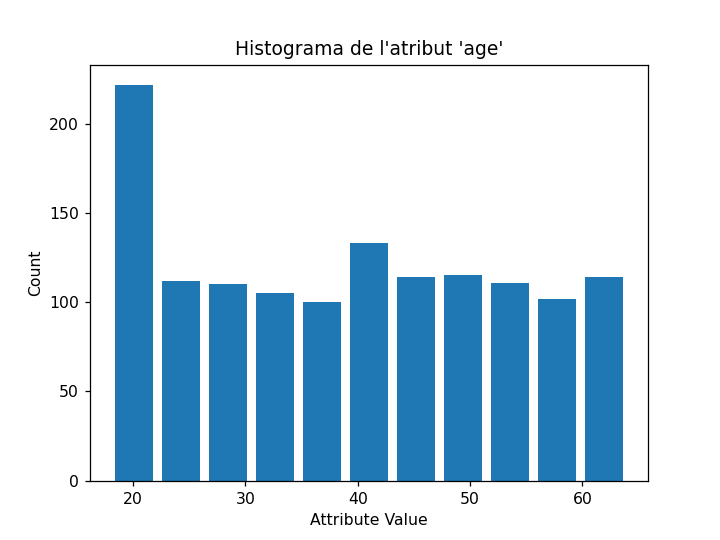

In [99]:
# Histograma de l'atribut 'age'

plt.figure()
plt.title("Histograma de l'atribut 'age'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,0], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


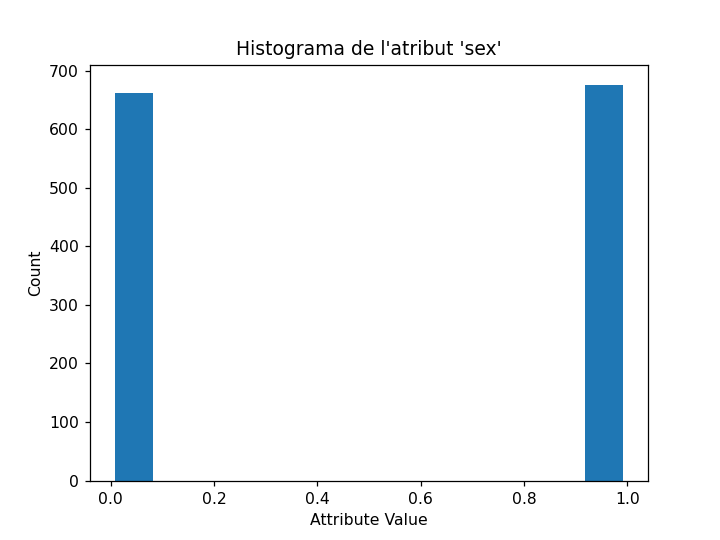

In [100]:
# histograma de l'atribut 'sex'

plt.figure()
plt.title("Histograma de l'atribut 'sex'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['sex'], bins=11, range=[np.min(dataset['sex']), np.max(dataset['sex'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


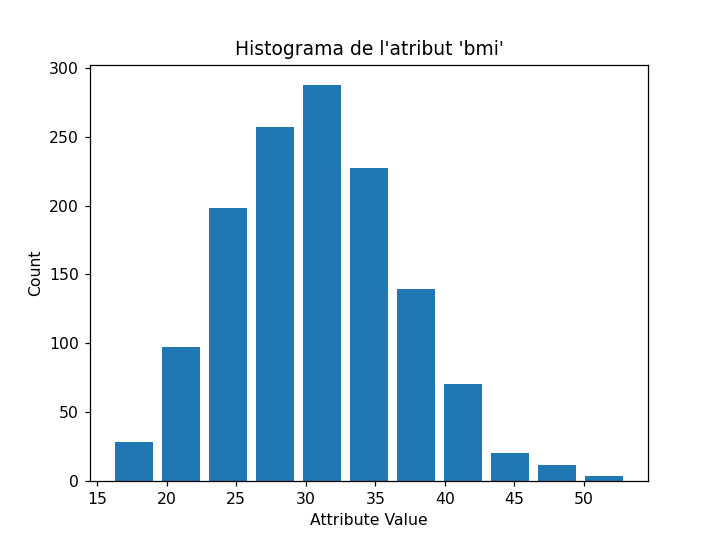

In [101]:
# Histograma de l'atribut 'bmi'

plt.figure()
plt.title("Histograma de l'atribut 'bmi'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['bmi'], bins=11, range=[np.min(dataset['bmi']), np.max(dataset['bmi'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


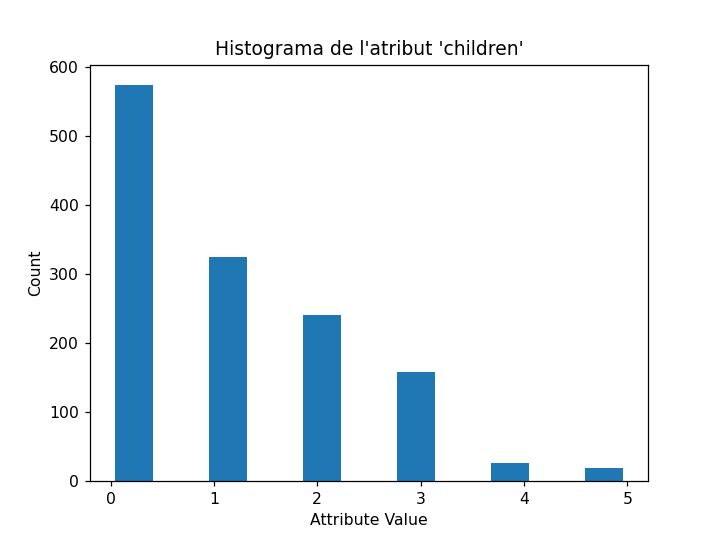

In [102]:
# Histograma de l'atribut 'children'

plt.figure()
plt.title("Histograma de l'atribut 'children'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['children'], bins=11, range=[np.min(dataset['children']), np.max(dataset['children'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


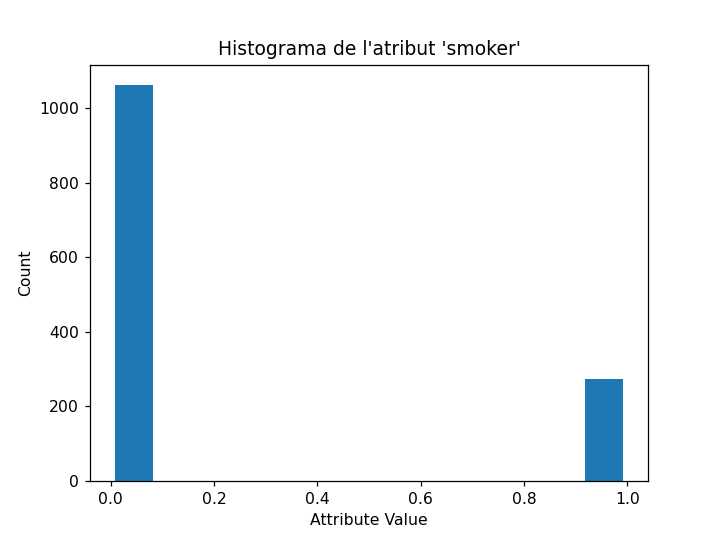

In [103]:
# Histograma de l'atribut 'smoker'

plt.figure()
plt.title("Histograma de l'atribut 'smoker'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['smoker'], bins=11, range=[np.min(dataset['smoker']), np.max(dataset['smoker'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


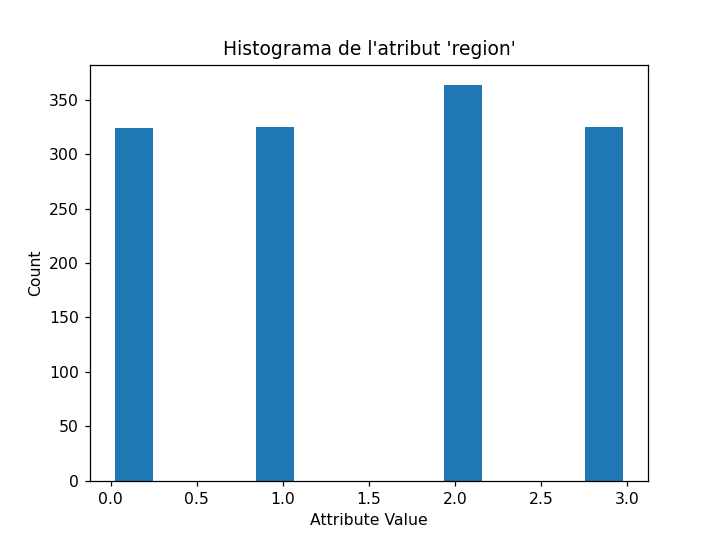

In [104]:
# Histograma de l'atribut 'region'

plt.figure()
plt.title("Histograma de l'atribut 'region'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['region'], bins=11, range=[np.min(dataset['region']), np.max(dataset['region'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


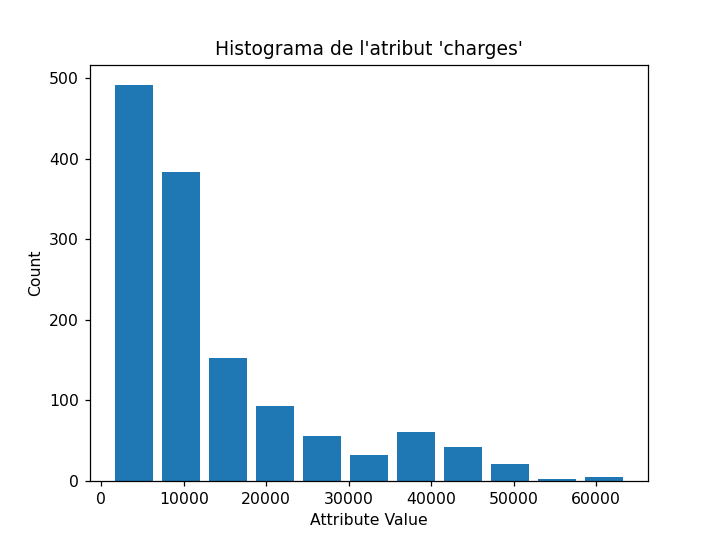

In [105]:
# Histograma de l'atribut 'charges'

plt.figure()
plt.title("Histograma de l'atribut 'charges'")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(dataset['charges'], bins=11, range=[np.min(dataset['charges']), np.max(dataset['charges'])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


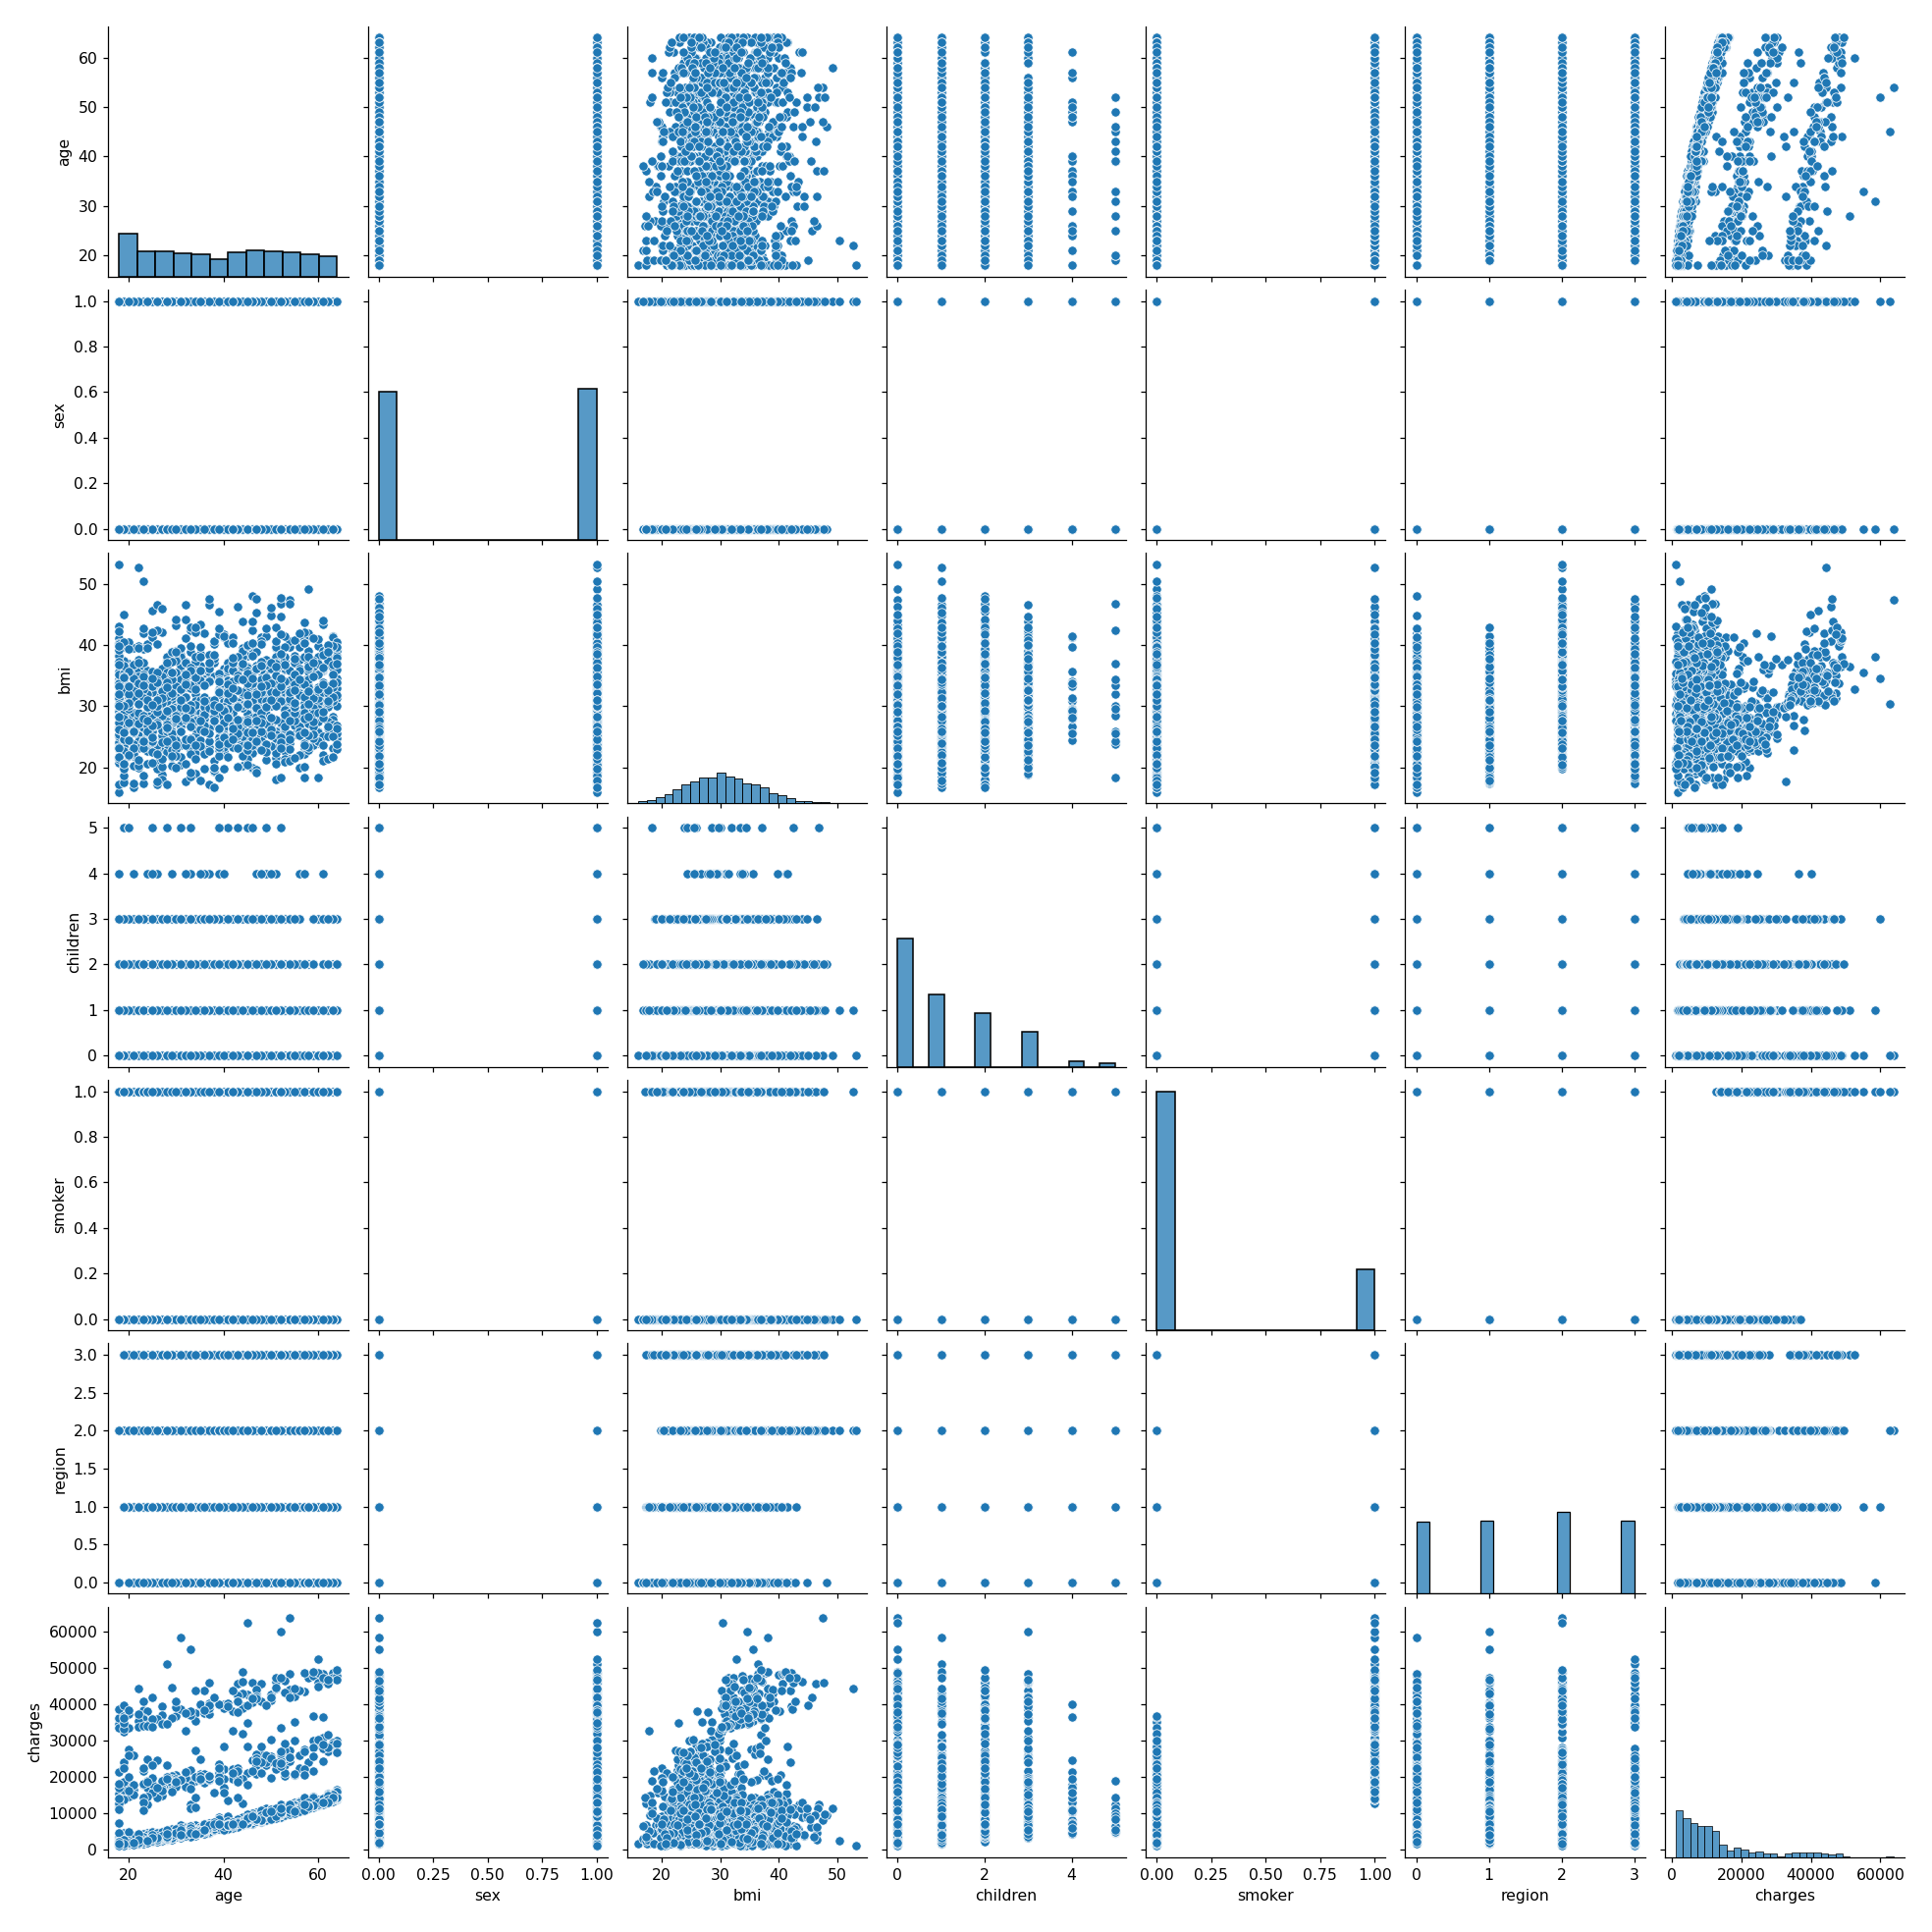

In [107]:
# Mirem la relació entre atributs utilitzant la funció pairplot

relacio = sns.pairplot(dataset)

<IPython.core.display.Javascript object>


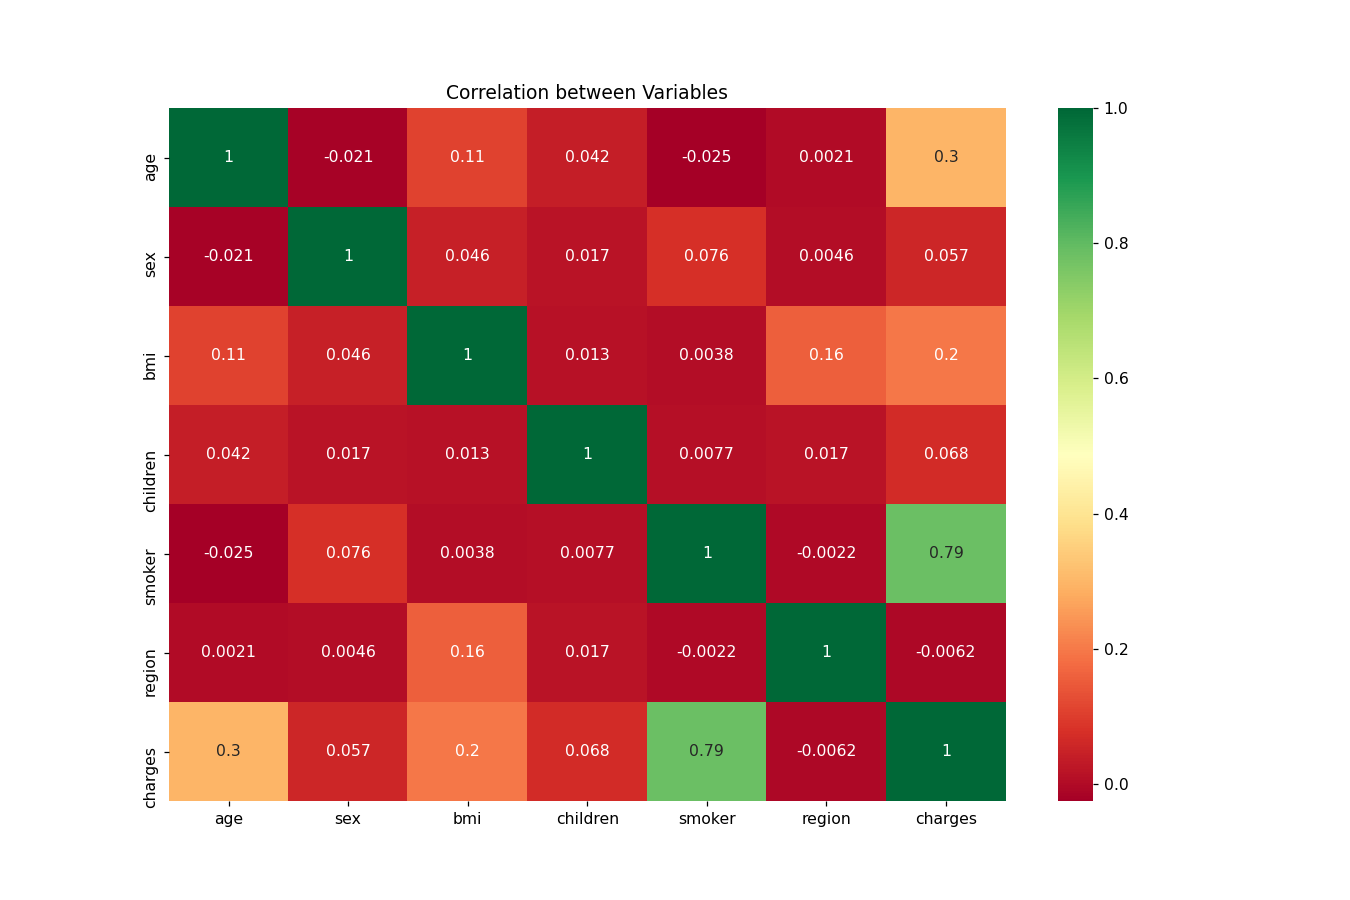

In [108]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [109]:
# Funció per calcular l'error quadràtic mitjà

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

In [110]:
# Funció per fer una regressió

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [111]:
# Funció per estandaritzar les dades

def standarize(x_train):
    n = len(x_train)
    mean = x_train.mean(0)
    std = x_train.std(0)
    mean_v = np.full(n, mean)
    x_t = x_train - mean_v
    std_v = np.full(n, std)
    x_t /= std_v
    return x_t

In [112]:
# Estandaritzem les dades

sex = np.array(dataset['sex'])
charges = np.array(dataset['charges'])
age = np.array(dataset['age'])
bmi = np.array(dataset['bmi'])
smoker = np.array(dataset['smoker'])
region = np.array(dataset['region'])
children = np.array(dataset['children'])

charges_t = standarize(charges)
sex_t = standarize(sex)
age_t = standarize(age)
bmi_t = standarize(bmi)
smoker_t = standarize(smoker)
region_t = standarize(region)
children_t = standarize(children)

In [113]:
# Fem una nova base de dades amb els atributs estandaritzats

dades_t =  np.array([sex_t, age_t, bmi_t, smoker_t, region_t, children_t, charges_t])
dades_t = np.transpose(dades_t)
a = np.array(['sex','age','bmi','smoker','region','children','charges'])
new_dataset = pd.DataFrame(dades_t, columns = a)

dades_pca =  np.array([sex_t, age_t, bmi_t, smoker_t, region_t, children_t])
dades_pca = np.transpose(dades_pca)
a2 = np.array(['sex','age','bmi','smoker','region','children'])
new_dataset_PCA = pd.DataFrame(dades_pca, columns = a2)

In [114]:
new_dataset

,sex,age,bmi,smoker,region,children,charges
0,-1.011,-1.439,-0.453,1.971,1.344,-0.909,0.299
1,0.990,-1.510,0.510,-0.507,0.438,-0.079,-0.954
2,0.990,-0.798,0.383,-0.507,0.438,1.581,-0.729
3,0.990,-0.442,-1.306,-0.507,-0.467,-0.909,0.720
4,0.990,-0.513,-0.293,-0.507,-0.467,-0.909,-0.777
...,...,...,...,...,...,...,...
1333,0.990,0.768,0.050,-0.507,-0.467,1.581,-0.221
1334,-1.011,-1.510,0.206,-0.507,-1.372,-0.909,-0.914
1335,-1.011,-1.510,1.015,-0.507,0.438,-0.909,-0.962
1336,-1.011,-1.296,-0.798,-0.507,1.344,-0.909,-0.930


In [115]:
# Anem a dividir ara el dataset en el que serà la nova x i la nova y

x_t = dades_t[:, :-1]
y_t = dades_t[:, -1]

Anem a provar de fer regressions linials de cada atribut amb l'atribut objectiu (atribut 'charges'). 
Tot això sense haver normalitzat abans els atributs

<IPython.core.display.Javascript object>


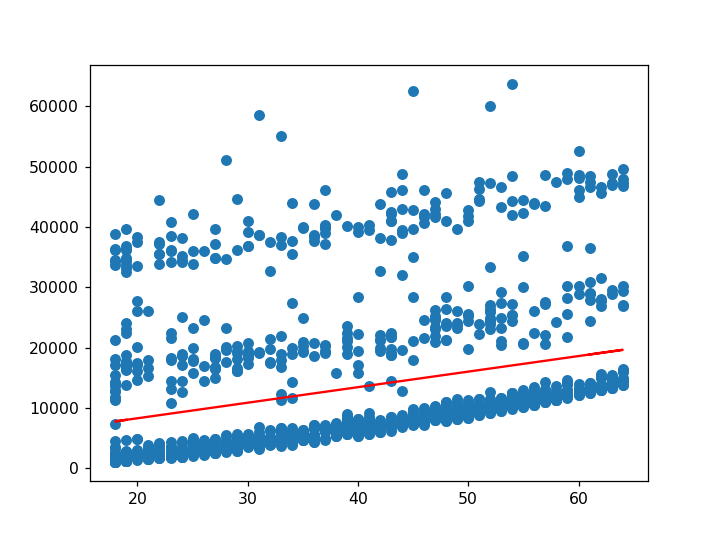

Mean squeared error:  133440978.61376347
R2 score:  0.08940589967885804


In [116]:
# REGRESSIÓ LINIAL AGE - CHARGES (atributs no estandaritzats)

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,0].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


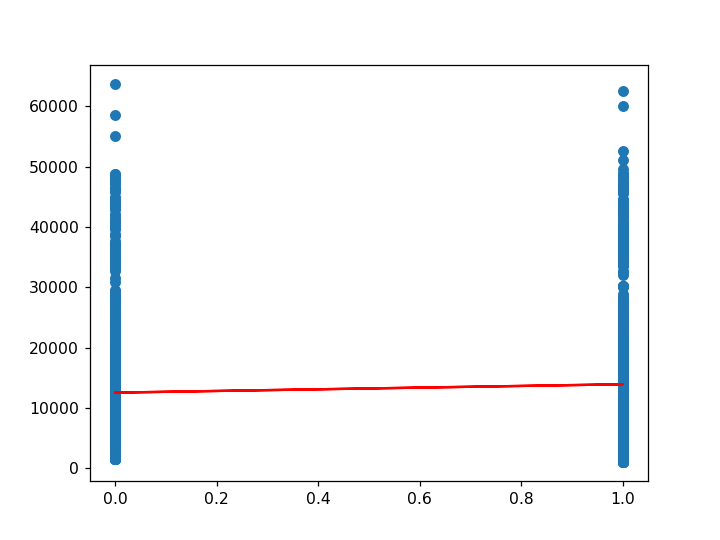

Mean squeared error:  146061757.39031374
R2 score:  0.003282380391360862


In [117]:
# REGRESSIÓ LINIAL SEX - CHARGES (atributs no estandaritzats)

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,1].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,1], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


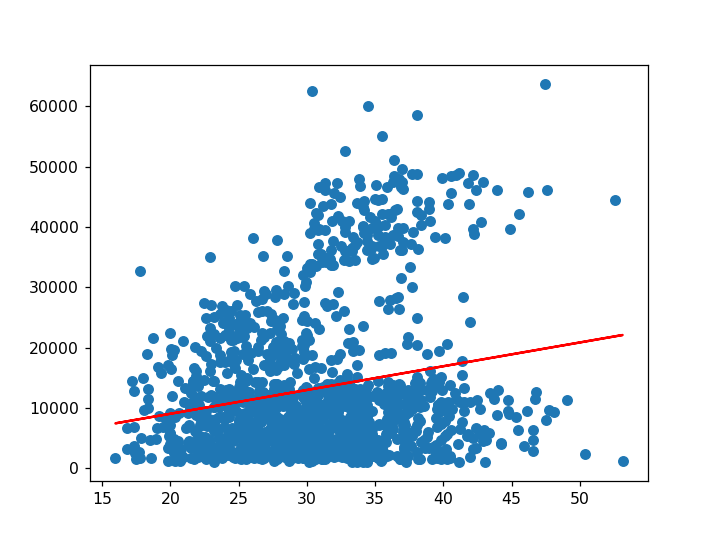

Mean squeared error:  140777900.09850758
R2 score:  0.03933913991786253


In [118]:
# REGRESSIÓ LINIAL BMI - CHARGES (atributs no estandaritzats)

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,2].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,2], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


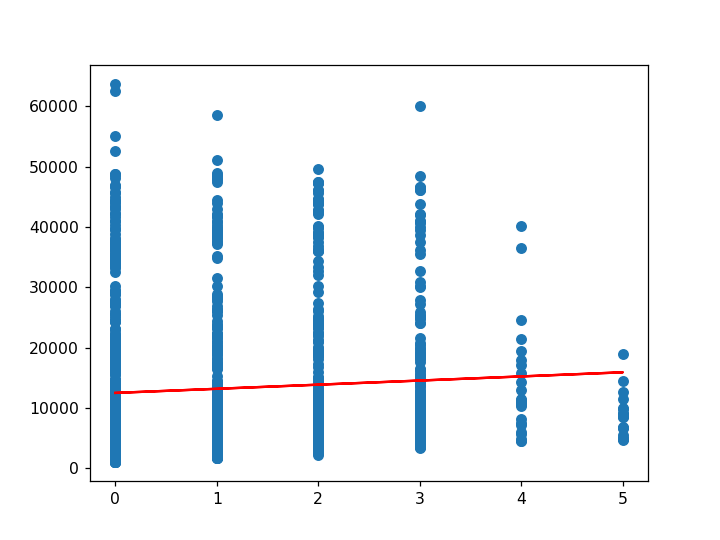

Mean squeared error:  145865188.07941642
R2 score:  0.004623758854459203


In [119]:
# REGRESSIÓ LINIAL CHILDREN - CHARGES (atributs no estandaritzats)

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,3].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,3], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


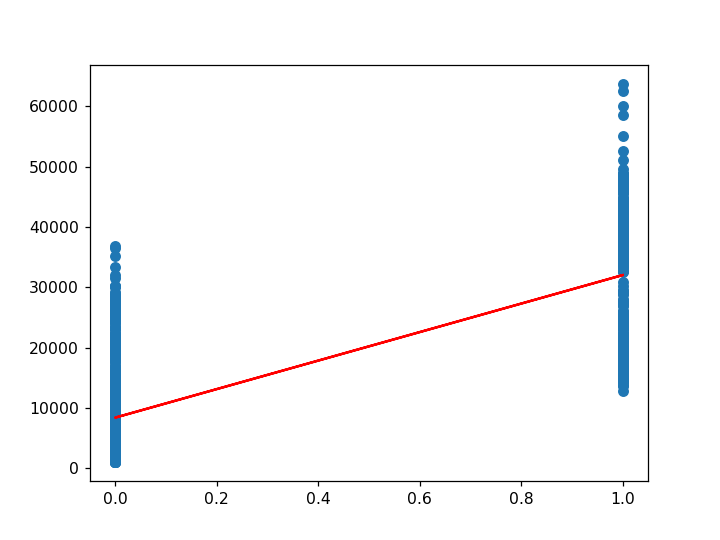

Mean squeared error:  55720715.95418544
R2 score:  0.6197648148218988


In [120]:
# REGRESSIÓ LINIAL SMOKER - CHARGES (atributs no estandaritzats)

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,4].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,4], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


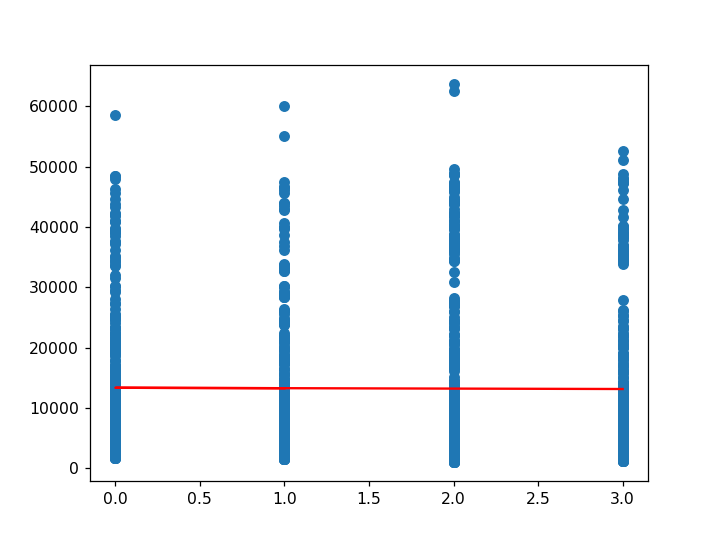

Mean squeared error:  146537118.41576278
R2 score:  3.854218069099247e-05


In [121]:
# REGRESSIÓ LINIAL REGION - CHARGES

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,5].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,5], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

In [122]:
# Veiem que en tots els casos donen errors quadràtics mitjans molt grans.
# Això es deu a que no estan les dades estanderitzades.
# Per tant, anem a provar de fer les regressions amb les dades estanderitzades

<IPython.core.display.Javascript object>


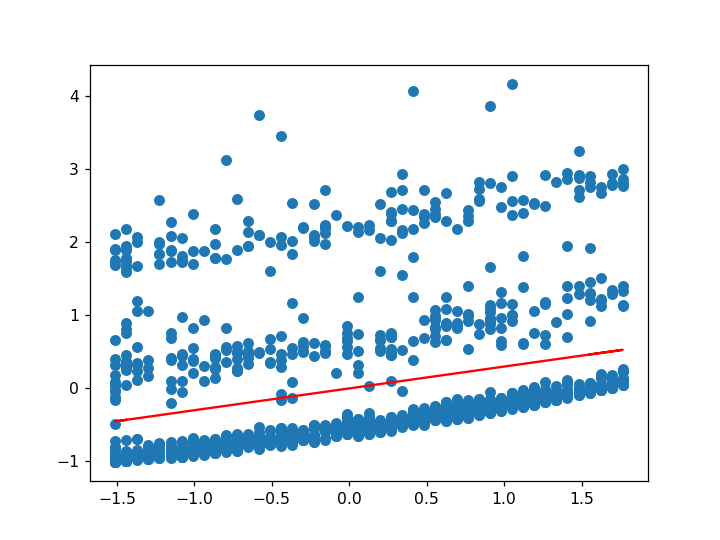

Mean squeared error:  0.910594100321142
R2 score:  0.08940589967885793


In [123]:
# REGRESSIÓ LINIAL AGE - CHARGES (atributs estandaritzats)

atribut_nou = age_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


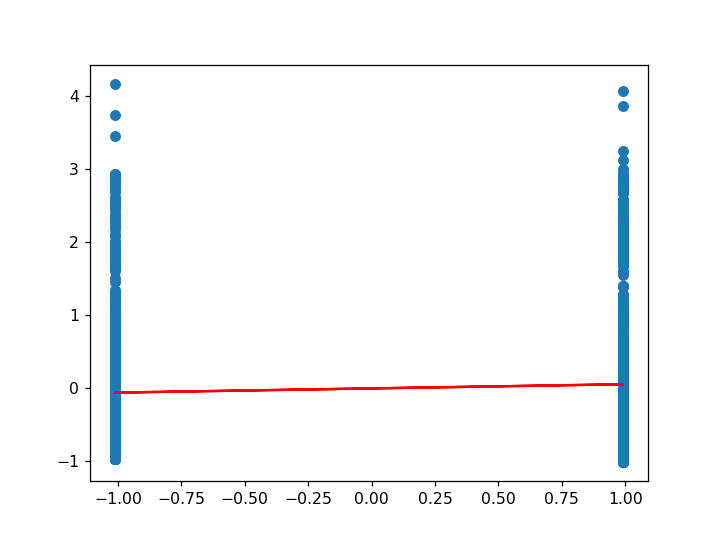

Mean squeared error:  0.9967176196086391
R2 score:  0.0032823803913606397


In [124]:
# REGRESSIÓ LINIAL SEX - CHARGES (atributs estandaritzats)

atribut_nou = sex_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


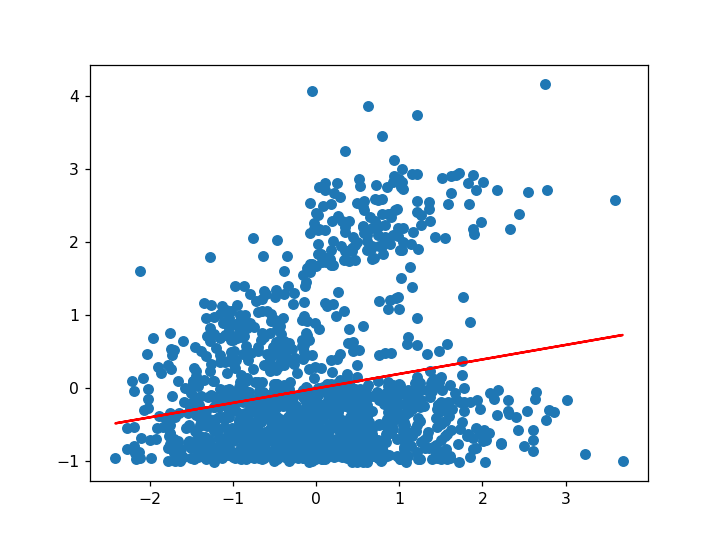

Mean squeared error:  0.9606608600821375
R2 score:  0.03933913991786242


In [125]:
# REGRESSIÓ LINIAL BMI - CHARGES (atributs estandaritzats)

atribut_nou = bmi_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


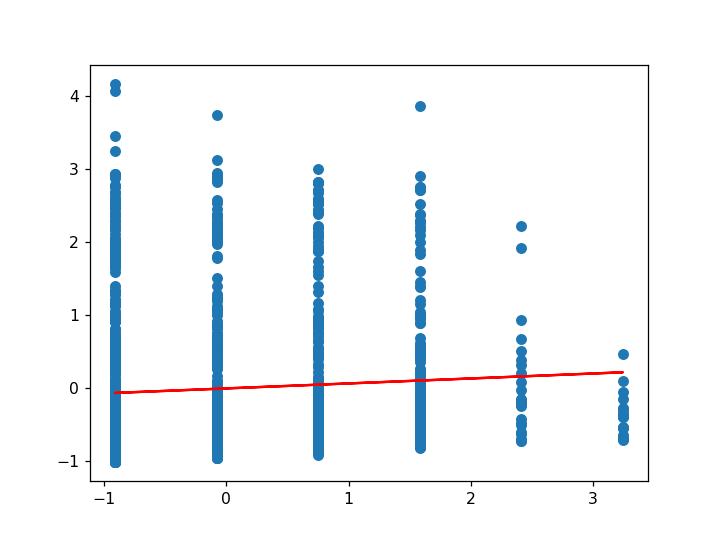

Mean squeared error:  0.9953762411455408
R2 score:  0.004623758854458981


In [126]:
# REGRESSIÓ LINIAL CHILDREN - CHARGES (atributs no estandaritzats)

atribut_nou = children_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


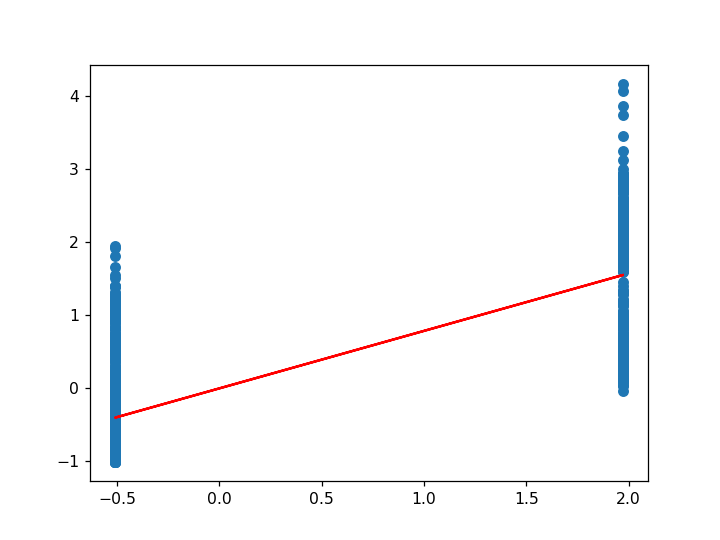

Mean squeared error:  0.38023518517810123
R2 score:  0.6197648148218987


In [127]:
# REGRESSIÓ LINIAL SMOKER - CHARGES (atributs no estandaritzats)

atribut_nou = smoker_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<ipython-input-128-d86c79c76f3b>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


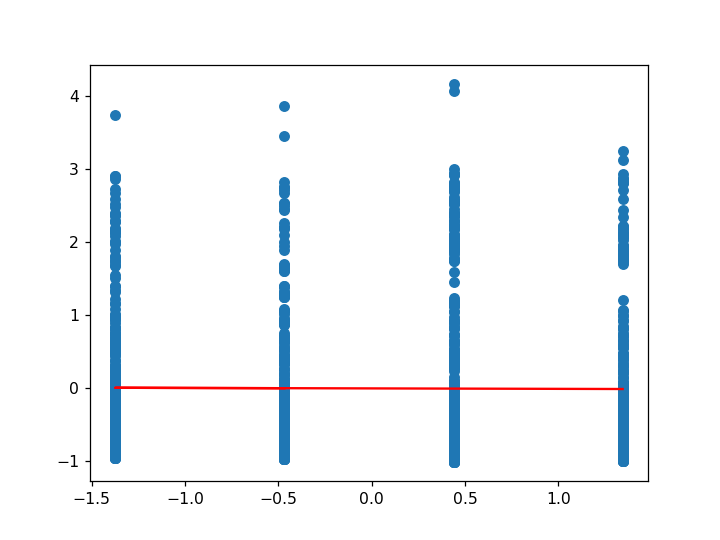

Mean squeared error:  0.999961457819309
R2 score:  3.8542180690881445e-05


In [128]:
# REGRESSIÓ LINIAL REGION - CHARGES

atribut_nou = region_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

Veiem que ara els valors de l'error quadràtic mitjà sí que tenen sentit, però continuen sent massa alts. 
De moment el que ens ha donat el millor valor és la regressió smoker-charges, amb mse = 0.38023518517810123

Ara anem a provar de fer regressions linials amb la suma de diferents atributs

<IPython.core.display.Javascript object>


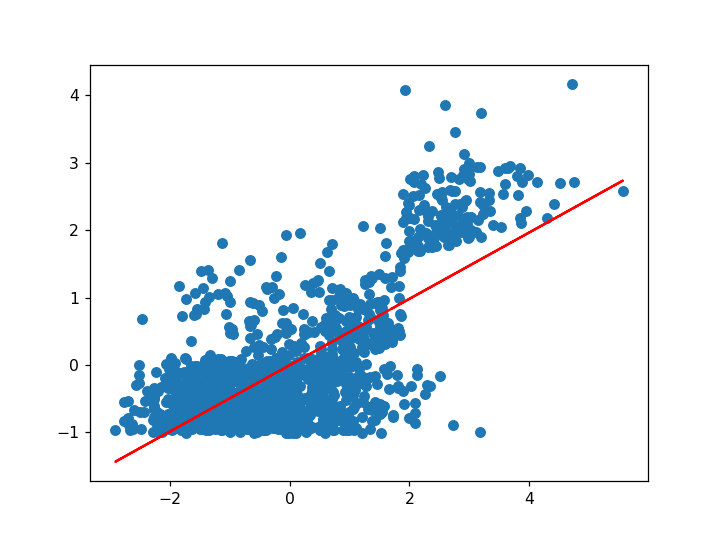

Mean squeared error:  0.5161185726295401
R2 score:  0.4838814273704598


In [129]:
# Nou atribut = BMI + SMOKER

atribut_nou = bmi_t + smoker_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


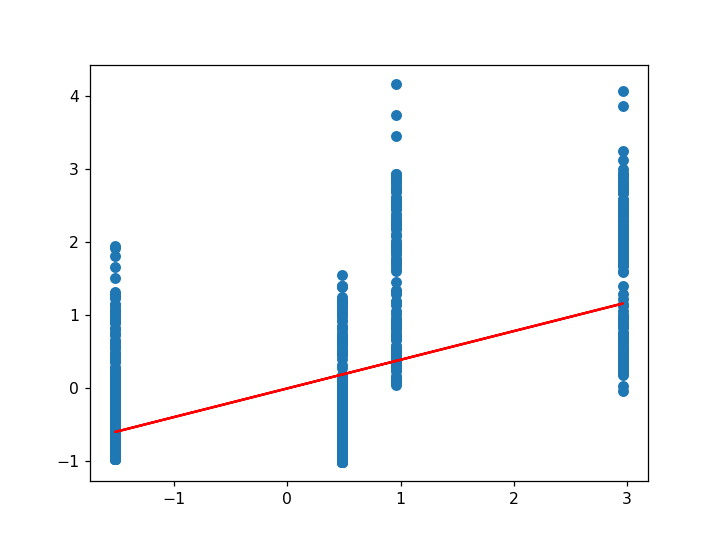

Mean squeared error:  0.6686193208414967
R2 score:  0.3313806791585032


In [130]:
# Nou atribut = SEX + SMOKER

atribut_nou = sex_t + smoker_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


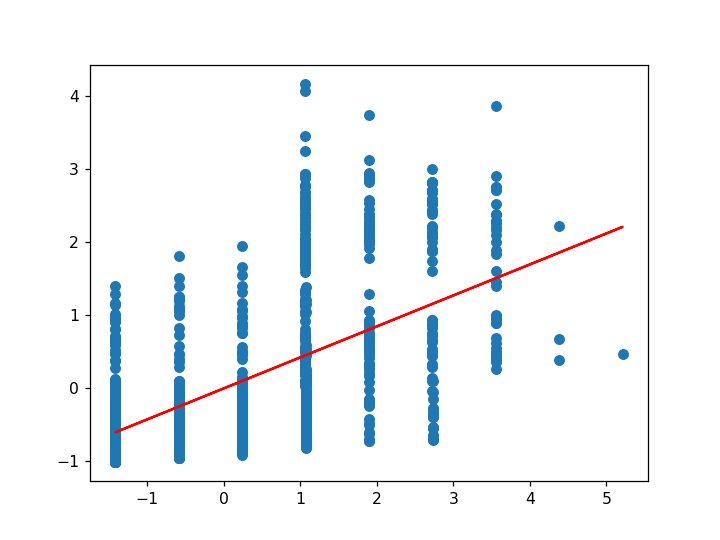

Mean squeared error:  0.6370589025101007
R2 score:  0.3629410974898992


In [131]:
# Nou atribut = CHILDREN + SMOKER

atribut_nou = children_t + smoker_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


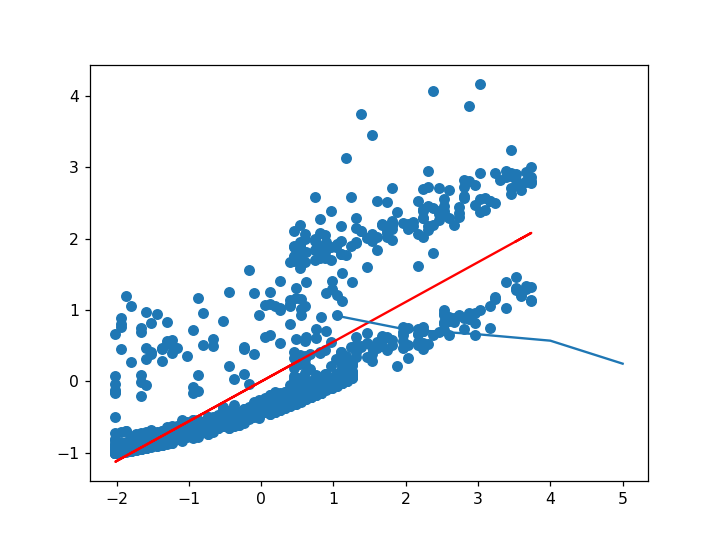

Mean squeared error:  0.39488068502821794
R2 score:  0.605119314971782


In [132]:
# Nou atribut = AGE + SMOKER

atribut_nou = age_t + smoker_t
atribut1 = atribut_nou.reshape(x.shape[0], 1) 
regr = regression(atribut1, charges_t) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(atribut1, charges_t)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(charges_t, predicted)
r2 = r2_score(charges_t , predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

Veiem que la regressió que ens dona millor resultat és la de age+smoker - charges, amb mse = 0.39488068502821794

In [133]:
# Anem a provar ara de fer una regressió linial múltiple amb tots els atributs

regr = regression(new_dataset_PCA, y_t)

pred = regr.predict(new_dataset_PCA)

MSE = mse(y_t,pred)
r2 = r2_score(y_t,pred)

print(MSE)
print(r2)

0.24926279720050626
0.7507372027994937


Veiem que la regressió linial múltiple és la que de moment ens ha donat millors resultats, amb mse = 0.24926279720050626

Anem a fer un PCA, per veure a quants componenets podem reduir l'espai.
Abans però, dividirem les dades en dades d'entrenament i dades de test.

In [134]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes, 
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en 
un 80% d'entrenament i un 20% de validació.
"""
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x_t, y_t)

In [135]:
mses = []
for i in range(1,6):
    pca = PCA(i)
    pca_x = pca.fit_transform(x_t)
    
    linear_model = LinearRegression()
    linear_model.fit(pca_x, y_t)
    preds = linear_model.predict(pca_x)

    mse = mean_squared_error(preds, y_t)
    r2 = r2_score(preds, y_t)
    print(f"PCA_{i} - MSE: {mse:.3f}")
    
    mses.append(mse)
    
plt.plot([1,2,3,4,5],mses)

PCA_1 - MSE: 0.930
PCA_2 - MSE: 0.728
PCA_3 - MSE: 0.661
PCA_4 - MSE: 0.572
PCA_5 - MSE: 0.249


Veiem que el nostre model, a la que es deixa de fer servir algun atribut a l'hora de fer la regressió linial, empitjoren 
bastant els resultats. 
 Anem a analitzar el percentatge de variança explicada per cada component per comprovar això que hem vist.

In [136]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(new_dataset_PCA)

modelo_pca = pca_pipe.named_steps['pca']
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = new_dataset_PCA.columns,
)

,sex,age,bmi,smoker,region,children
0,-0.153,-0.396,-0.690,-0.022,-0.556,-0.185
1,0.664,-0.331,0.000,0.670,0.016,0.031
2,0.109,0.485,-0.140,0.110,-0.447,0.723
3,-0.157,-0.563,-0.152,-0.163,0.421,0.657
4,-0.678,0.096,-0.036,0.716,0.133,0.004
5,-0.201,-0.415,0.693,0.001,-0.544,0.106


----------------------------------------------------
Percentatge de variança explicada per cada component
----------------------------------------------------
[0.20060309 0.1813664  0.16992314 0.16087702 0.15399424 0.1332361 ]


<IPython.core.display.Javascript object>


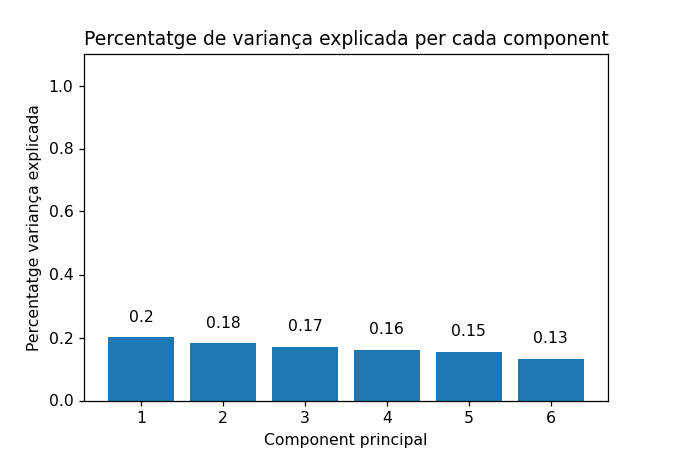

In [137]:
# Percentatge de variança explicada per cada component
# ==============================================================================
print('----------------------------------------------------')
print('Percentatge de variança explicada per cada component')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(new_dataset_PCA.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentatge de variança explicada per cada component')
ax.set_xlabel('Component principal')
ax.set_ylabel('Percentatge variança explicada');

------------------------------------------
Percentatge de variança explicada acumulada
------------------------------------------
[0.20060309 0.38196949 0.55189263 0.71276965 0.8667639  1.        ]


<IPython.core.display.Javascript object>


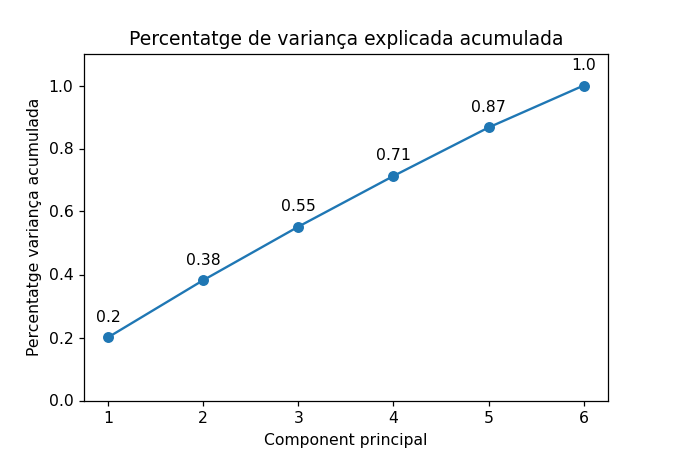

In [138]:
# Percentatge de variança explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Percentatge de variança explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(new_dataset_PCA.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(new_dataset_PCA.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Percentatge de variança explicada acumulada')
ax.set_xlabel('Component principal')
ax.set_ylabel('Percentatge variança acumulada');

Com podem veure, la variança total esta explicada de manera molt igual per cada atribut.
Per tant, no podem precindir de cap a l'hora de fer la regressió.

Ara implementarem una classe per poder fer un regressor amb el descens del gradient 

In [139]:
class Regressor_DescensGradient(object):
    def __init__(self, num_params, alpha=.1, max_iter=1000, tolerance=1e-3, regularitzador=0):
        self.w = np.zeros((num_params+1))
        self.alpha = alpha
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.regularitzador = regularitzador
    
    def predict(self, x):
        prediccions = np.zeros(x.shape[0])
        i = 0
        for mostra in x:
            valor = np.dot(mostra,self.w)
            prediccions[i] = valor 
            i += 1
        return prediccions
    
    def inference(self, x):
        x = np.hstack((np.ones((x.shape[0], 1)), x)) # añadimos un 1 a todas las muestras
        return self.predict(x)
    
    def compute_cost(self, x, y):
        samples = x.shape[0]
        preds = self.predict(x)
        error = preds - y
        cost = 1/(2 * samples) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        return cost, error

    def update(self, x, error):
        samples = x.shape[0]
        self.w = self.w - (self.alpha * ((1/samples) * np.dot(x.T, error) - self.regularitzador/samples * self.w))
        gradient = (1/samples) * np.dot(x.T, error)
        #print(self.w - gradient)
        return gradient
    
    def fit(self, x, y):
        x = np.hstack((np.ones((x.shape[0], 1)), x)) # afegim un 1 a totes les mostres
        modul_gradient = 1e9
        i = 0
        
        while ((i < self.max_iter) and (modul_gradient > self.tolerance)):
            i += 1
            cost, error = self.compute_cost(x, y)
            gradient = self.update(x, error)
            modul_gradient = np.linalg.norm(gradient)

In [140]:
# PROVEM EL RESULTAT AMB LES DADES D'ENTRENAMENT

dg = Regressor_DescensGradient(6)
dg.fit(x_train, y_train)
preds = dg.inference(x_train)
mse = mean_squared_error(y_train, preds)
r2 = r2_score(y_train, preds)
print(mse, r2)

0.24708701652232268 0.7482158913939098


In [141]:
# PROVEM EL RESULTAT AMB LES DADES DE VALIDACIÓ

dg = Regressor_DescensGradient(6)
dg.fit(x_train, y_train)
preds = dg.inference(x_val)
mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)
print(mse, r2)

0.2613199687364527 0.7565680595847541


Veiem que amb el descens del gradient ens surt un error més o menys igual que amb la regressió múltiple

L'últim pas serà validar el regressor trobat pel descent del gradient desenvolupat en aquest apartat visualment, aplicat a un model de recta i un model de pla. Per a això, caldrà considerar el millor atribut identificat en el primer punt de l'anterior entrega per visualitzar la línia regressora en 2D (podeu mostrar dades 2d amb la funció scatter). Després, dos dels atributs identificats a l'últim punt del primer exercici per visualitzar el pla regressor en 3D (En el cas 3D l’scatter s’ha de fer sobre una figura amb projecció 3D).

<ipython-input-142-f926d3614432>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(A,predX3D)[0]


<IPython.core.display.Javascript object>


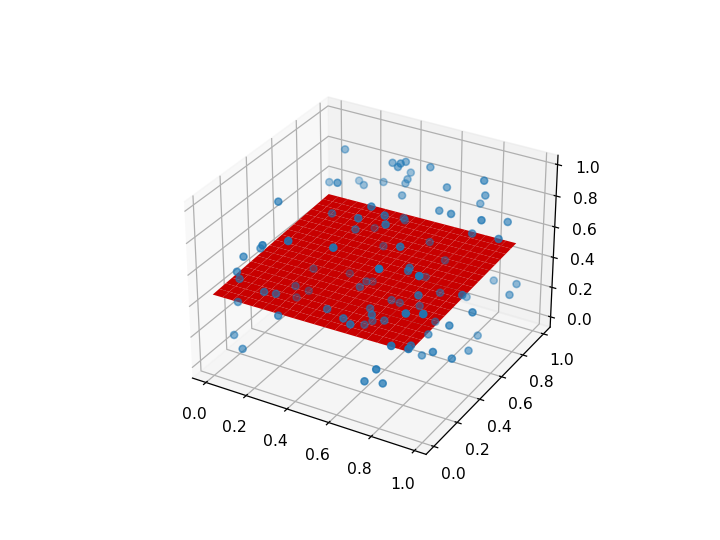

In [142]:
%matplotlib notebook

# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
# generem dades 3D d'exemple
x_r = np.random.random((100, 2))
y_r = np.random.random((100, 1))
regr = regression(x_r, y_r)
predX3D = regr.predict(x_r)

# Afegim els 1's
A = np.hstack((x_r,np.ones([x_r.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_r[:,0]) - min(x_r[:,0]))/2 + min(x_r[:,0])
malla_x2 =  malla * (max(x_r[:,1]) - min(x_r[:,1]))/2 + min(x_r[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

# Cal desnormalitzar les dades
def desnormalitzar(x, mean, std):
    return x * std + mean

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='red')
plt3d.scatter(x_r[:,0],x_r[:,1],y_r)